In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
df = pd.read_csv('covid_19.csv')
print(df)

         Country/Region  Confirmed  Deaths  Recovered  Active  New cases  \
0           Afghanistan      36263    1269      25198    9796        106   
1               Albania       4880     144       2745    1991        117   
2               Algeria      27973    1163      18837    7973        616   
3               Andorra        907      52        803      52         10   
4                Angola        950      41        242     667         18   
..                  ...        ...     ...        ...     ...        ...   
182  West Bank and Gaza      10621      78       3752    6791        152   
183      Western Sahara         10       1          8       1          0   
184               Yemen       1691     483        833     375         10   
185              Zambia       4552     140       2815    1597         71   
186            Zimbabwe       2704      36        542    2126        192   

     New deaths  New recovered  Deaths / 100 Cases  Recovered / 100 Cases  \
0         

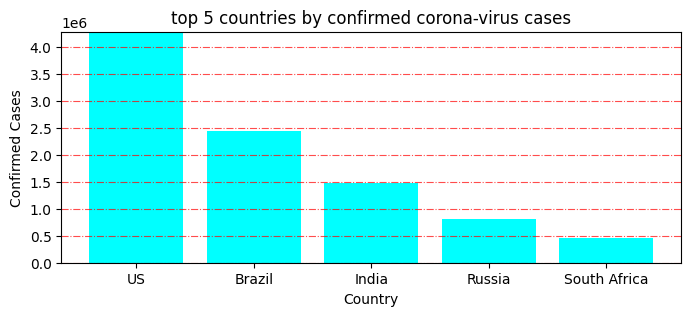

In [3]:
top_5 = df.nlargest(5, 'Confirmed')
plt.figure(figsize=(8,3))
plt.bar(top_5['Country/Region'], top_5['Confirmed'], color='aqua')
plt.title('top 5 countries by confirmed corona-virus cases')
plt.xlabel('Country')
plt.ylabel('Confirmed Cases')
plt.grid(axis='y', linestyle='-.', alpha=0.7, color='red')
max_val = top_5['Confirmed'].max()
plt.yticks(np.arange(0, max_val , step=500000))
plt.ylim(0, top_5['Confirmed'].max() )

plt.show()


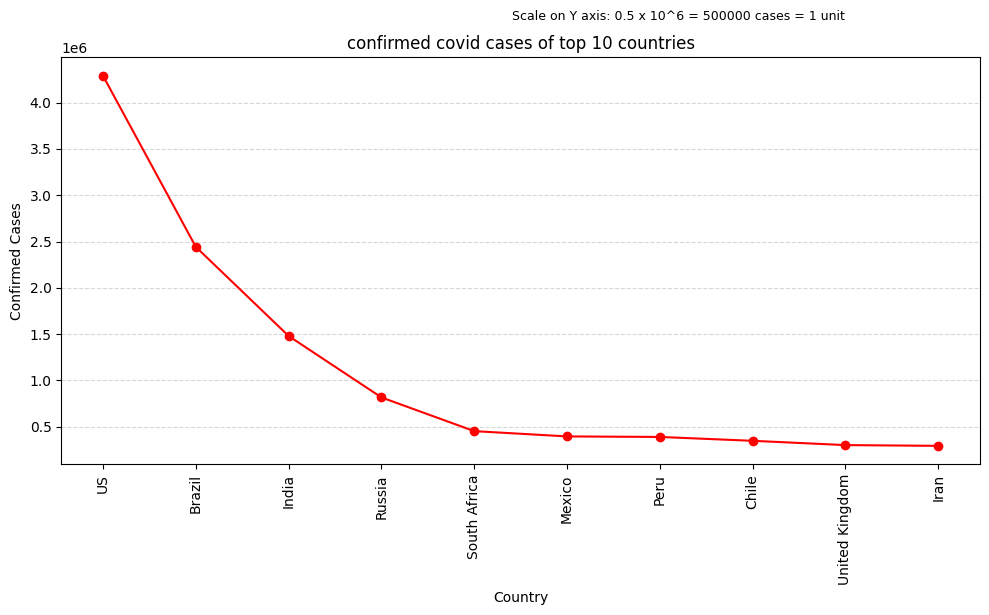

In [4]:
top_10 = df.nlargest(10, 'Confirmed')
plt.figure(figsize=(10, 6))

plt.plot(top_10['Country/Region'], top_10['Confirmed'], marker='o', linestyle='-', color='red')

plt.title('confirmed covid cases of top 10 countries')
plt.xlabel('Country')
plt.ylabel('Confirmed Cases')

plt.xticks(rotation=90)
plt.figtext(0.85, 1, 'Scale on Y axis: 0.5 x 10^6 = 500000 cases = 1 unit', fontsize=9, ha='right')

plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()

plt.show()


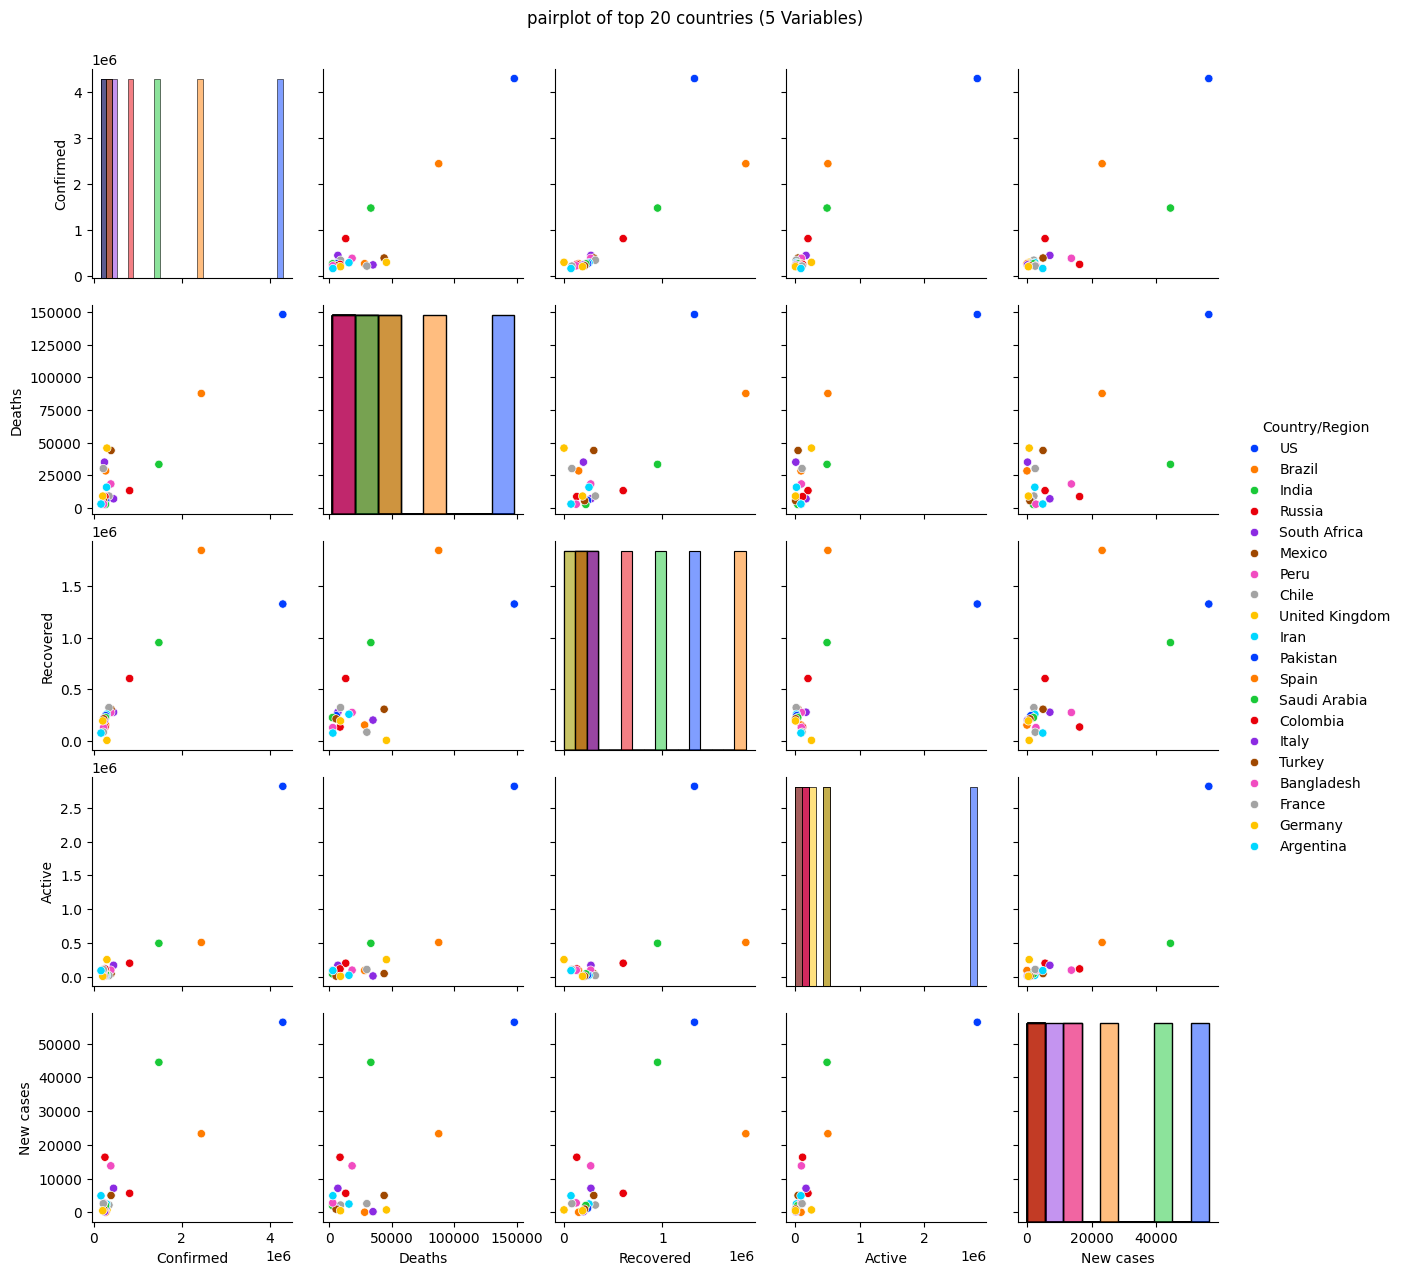

In [5]:
top_20 = df.nlargest(20, 'Confirmed')
selected_columns = ['Confirmed', 'Deaths', 'Recovered', 'Active', 'New cases']

sns.pairplot(top_20[selected_columns + ['Country/Region']],
             hue='Country/Region',
             diag_kind='hist',
             palette='bright')
plt.suptitle('pairplot of top 20 countries (5 Variables)', y=1.02)
plt.show()

# a pairplot is also used to identify the correlations among different variables just like a heatmap..


In [6]:
top_20 = df.nlargest(2, 'Confirmed')
print(top_20)
# i have executed this just to see how top_20[selected coulumns] is working...

    Country/Region  Confirmed  Deaths  Recovered   Active  New cases  \
173             US    4290259  148011    1325804  2816444      56336   
23          Brazil    2442375   87618    1846641   508116      23284   

     New deaths  New recovered  Deaths / 100 Cases  Recovered / 100 Cases  \
173        1076          27941                3.45                  30.90   
23          614          33728                3.59                  75.61   

     Deaths / 100 Recovered  Confirmed last week  1 week change  \
173                   11.16              3834677         455582   
23                     4.74              2118646         323729   

     1 week % increase WHO Region  
173              11.88   Americas  
23               15.28   Americas  


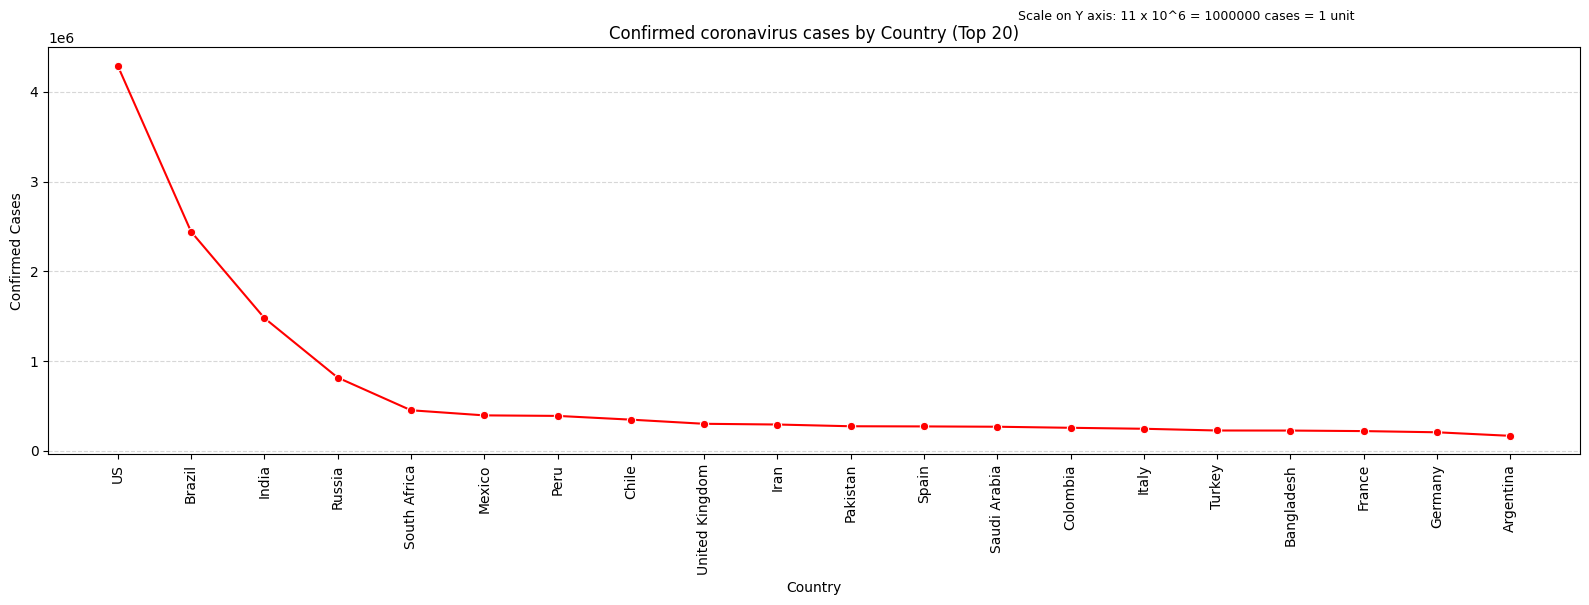

In [7]:
top20 = df.nlargest(20, 'Confirmed')
plt.figure(figsize=(16, 6))

sns.lineplot(data=top20, x='Country/Region', y='Confirmed', marker='o', color='red')

plt.title('Confirmed coronavirus cases by Country (Top 20)')
plt.xlabel('Country')
plt.ylabel('Confirmed Cases')
plt.xticks(rotation=90)
plt.figtext(0.85, 1, 'Scale on Y axis: 11 x 10^6 = 1000000 cases = 1 unit', fontsize=9, ha='right', va='top')

plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()

plt.show()


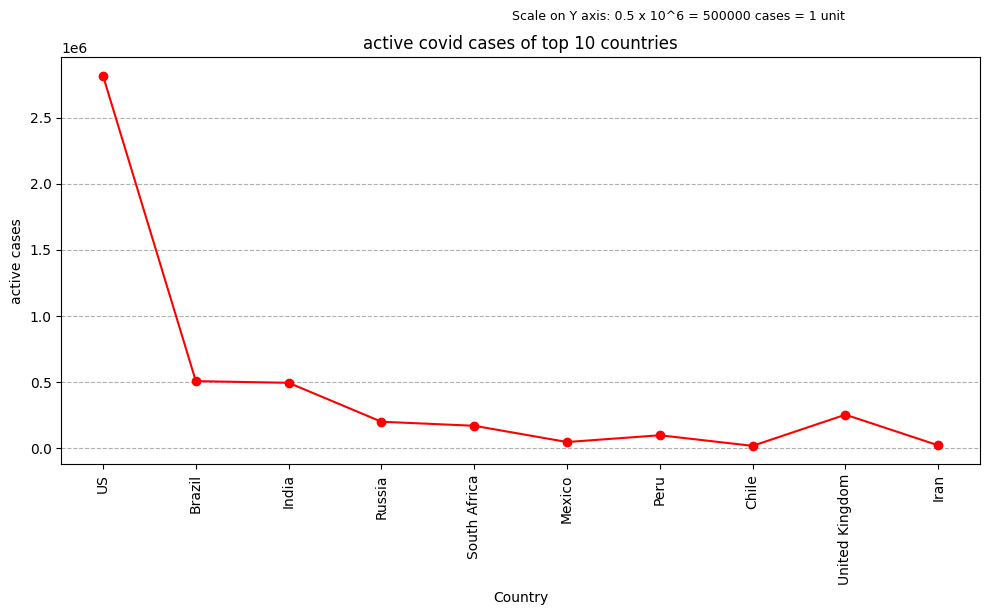

In [8]:
top_10 = df.nlargest(10,'Confirmed')
plt.figure(figsize=(10, 6))

plt.plot(top_10['Country/Region'], top_10['Active'], marker='o', linestyle='-', color='red')

plt.title('active covid cases of top 10 countries')
plt.xlabel('Country')
plt.ylabel('active cases')

plt.xticks(rotation=90)
plt.figtext(0.85, 1, 'Scale on Y axis: 0.5 x 10^6 = 500000 cases = 1 unit', fontsize=9, ha='right')

plt.grid(axis='y', linestyle='--', alpha=1)
plt.tight_layout()

plt.show()


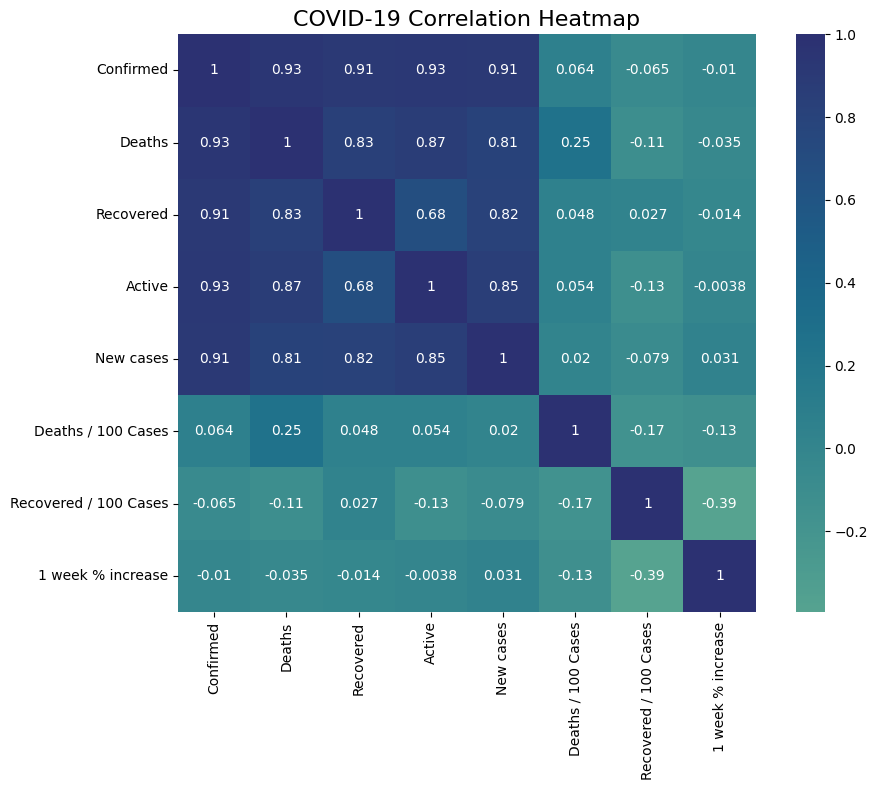

'heatmap is a visualization tool which represents 2D data in the form of colors\nmore value -> more dark color\nless value -> light color\nbasically a heatmap is used to identify correlations between different variables\nin the dataset. since heatmap is used to identify relations between variables\nit is used for numeric data only.\n\n\nif we take the example of recovered/100 cases with 1week % increase then its correlation\nis -0.39. it is a negative relation. this means that with a high recovery rate the no.\nof new cases increment per week is less. '

In [9]:
# heatmap..
numeric_cols = ['Confirmed', 'Deaths', 'Recovered', 'Active', 'New cases',
                'Deaths / 100 Cases', 'Recovered / 100 Cases', '1 week % increase']

# Create correlation matrix
corr = df[numeric_cols].corr()

# Plot correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr,
            annot=True,           # Show correlation values
            cmap='crest',      # Color scheme
            center=0,             # Center colormap at 0
            square= True)          # Make cells square-shaped

plt.title('COVID-19 Correlation Heatmap', fontsize=16)
plt.tight_layout()
plt.show()

'''heatmap is a visualization tool which represents 2D data in the form of colors
more value -> more dark color
less value -> light color
basically a heatmap is used to identify correlations between different variables
in the dataset. since heatmap is used to identify relations between variables
it is used for numeric data only.


if we take the example of recovered/100 cases with 1week % increase then its correlation
is -0.39. it is a negative relation. this means that with a high recovery rate the no.
of new cases increment per week is less. '''


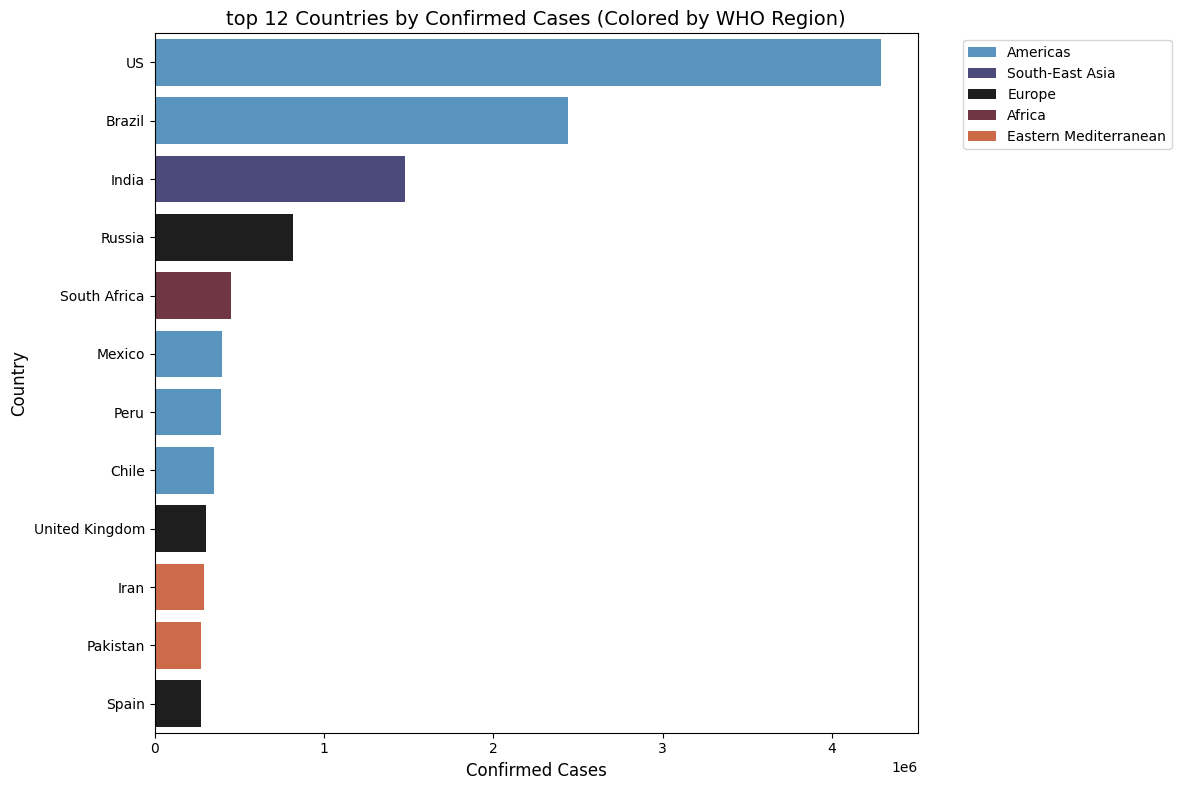

'this is a horizontal bar chart representing top 12 countries with maximum\nconfirmed cases with WHO regions highlighted respectively.'

In [10]:
top_12 = df.nlargest(12, 'Confirmed')
# df_sorted = df.sort_values('Confirmed', ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(data=top_12,
            y='Country/Region',
            x='Confirmed',
            hue='WHO Region',
            palette='icefire')

plt.title('top 12 Countries by Confirmed Cases (Colored by WHO Region)', fontsize=14)
plt.xlabel('Confirmed Cases', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()
'''this is a horizontal bar chart representing top 12 countries with maximum
confirmed cases with WHO regions highlighted respectively.'''

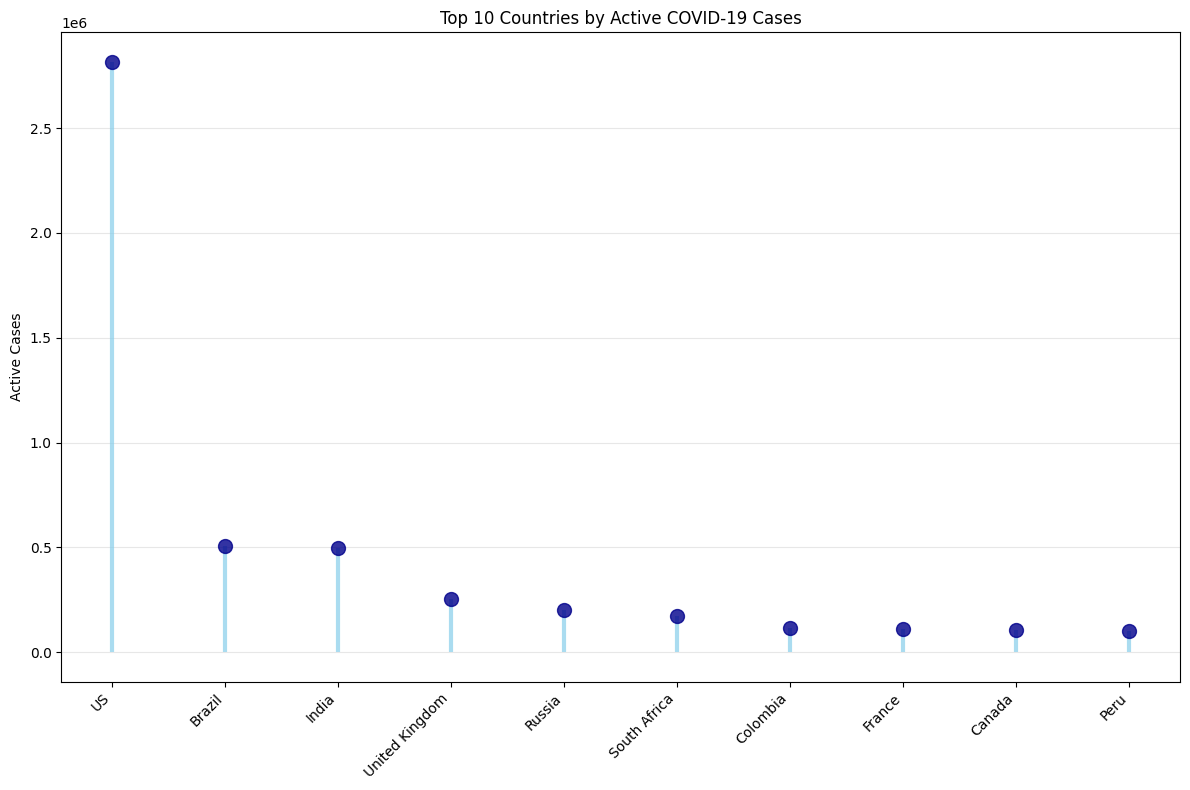

'lollipop chart representing top 10 countries active covid cases.'

In [11]:
top_10_active = df.nlargest(10, 'Active')

fig, ax = plt.subplots(figsize=(12, 8))

# Create vertical lollipop chart
ax.vlines(x=range(len(top_10_active)), ymin=0, ymax=top_10_active['Active'],
          color='skyblue', alpha=0.7, linewidth=3)
ax.plot(range(len(top_10_active)), top_10_active['Active'], "o",
        markersize=10, color='darkblue', alpha=0.8)

# Customize
ax.set_xticks(range(len(top_10_active)))
ax.set_xticklabels(top_10_active['Country/Region'], rotation=45, ha='right')
ax.set_ylabel('Active Cases')
ax.set_title('Top 10 Countries by Active COVID-19 Cases')
ax.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()
'''lollipop chart representing top 10 countries active covid cases.'''

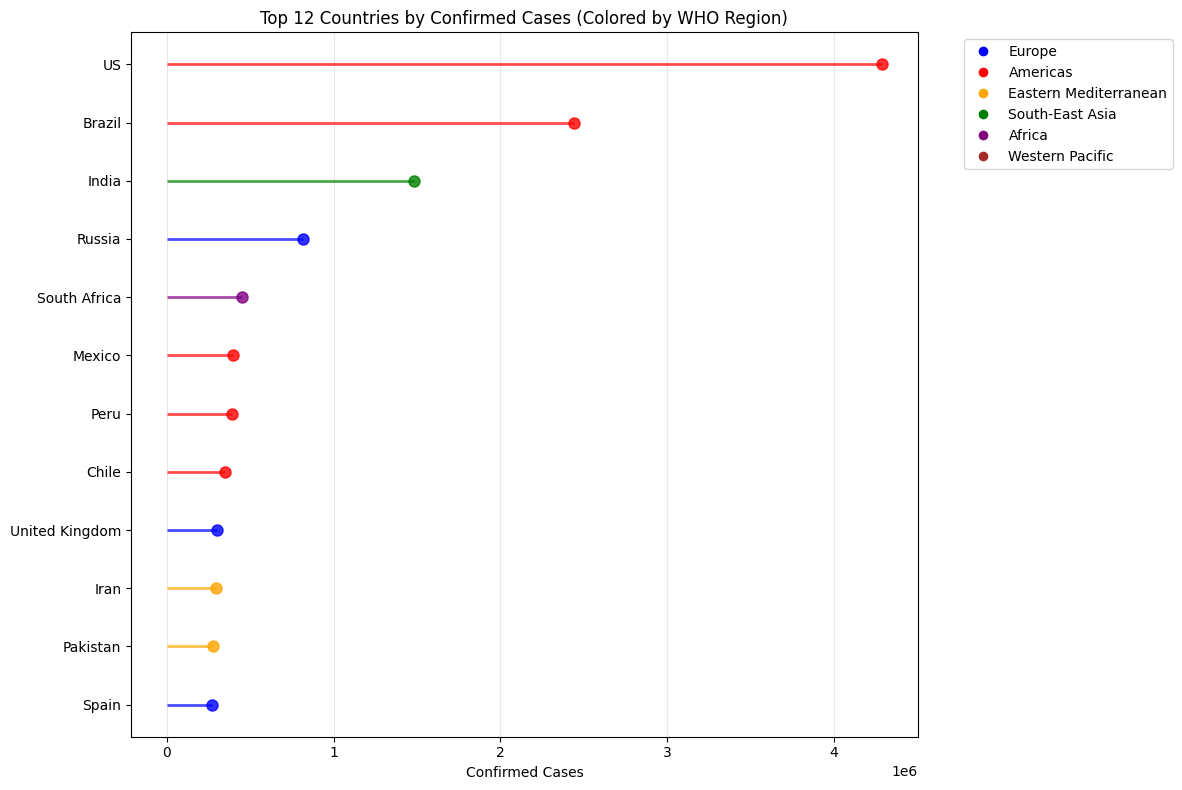

'colorful lollipop chart.'

In [ ]:
# Select top 12 countries for better region representation
top_12 = df.nlargest(12, 'Confirmed').sort_values('Confirmed')

# Define colors for different regions
region_colors = {
    'Europe': 'blue',
    'Americas': 'red',
    'Eastern Mediterranean': 'orange',
    'South-East Asia': 'green',
    'Africa': 'purple',
    'Western Pacific': 'brown'
}

# Map colors to countries based on their regions
colors = [region_colors.get(region, 'gray') for region in top_12['WHO Region']]

fig, ax = plt.subplots(figsize=(12, 8))

# Create colorful lollipop chart
for i, (country, cases, color) in enumerate(zip(top_12['Country/Region'],
                                               top_12['Confirmed'], colors)):
    ax.hlines(y=i, xmin=0, xmax=cases, color=color, alpha=0.7, linewidth=2)
    ax.plot(cases, i, "o", markersize=8, color=color, alpha=0.8)

# Customize
ax.set_yticks(range(len(top_12)))
ax.set_yticklabels(top_12['Country/Region'])
ax.set_xlabel('Confirmed Cases')
ax.set_title('Top 12 Countries by Confirmed Cases (Colored by WHO Region)')
ax.grid(axis='x', alpha=0.3)

# Add legend
handles = [plt.Line2D([0], [0], marker='o', color='w',
                     markerfacecolor=color, markersize=8, label=region)
          for region, color in region_colors.items()]
ax.legend(handles=handles, bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

'''colorful lollipop chart.'''